**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( B )

---


Analista de dados:
* Arthur Cavalcante de Andrade

---

# Análise Exploratória dos Dados

### Carregando os dados e realizando verificações

Neste tópico iremos importas as bibliotecas necessárias e realizar a verificação das informações iniciais dos dados.

In [1]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

In [2]:
df = pandas.read_csv('heart_failure_clinical_records_dataset.csv')
print('Número de linhas: ', len(df))
print('Número de colunas: ', len(df.columns))
df.head()

Número de linhas:  299
Número de colunas:  13


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Não existem ocorrências de dados nulos.

### Visualização Inicial dos Dados

<AxesSubplot:title={'center':'DEATH_EVENT'}>

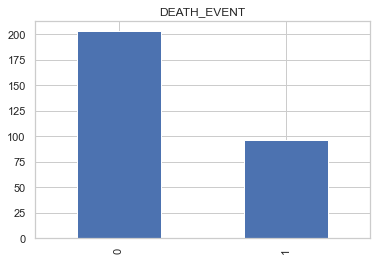

In [5]:
seaborn.set_theme(style="whitegrid")
df['DEATH_EVENT'].value_counts().plot(kind='bar', title='DEATH_EVENT')

Percebemos que existem pouco mais do que o dobro de eventos registrados como não mortes.

Verificaremos agora, antes de qualquer modificação, a correlação geral da base de dados:

<AxesSubplot:>

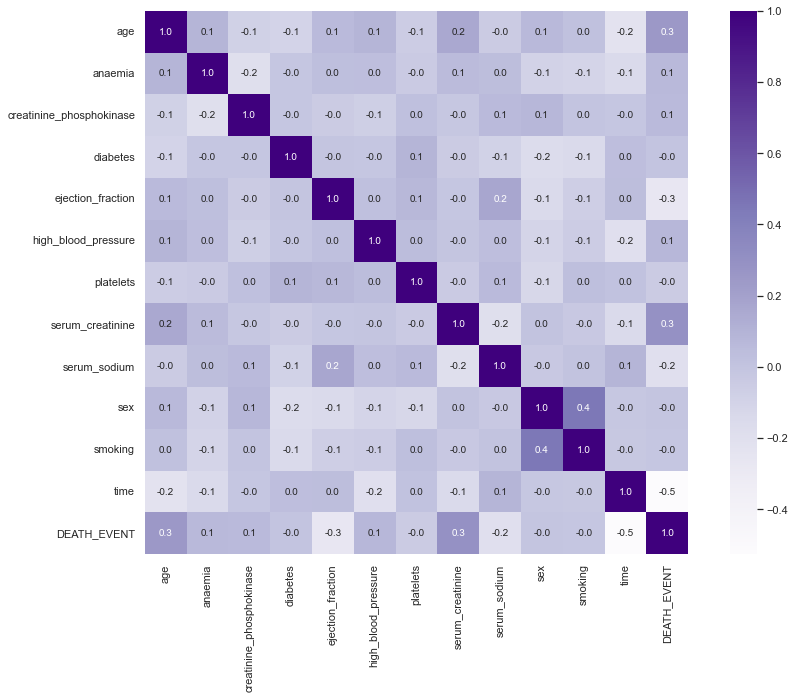

In [6]:
plt.figure(figsize=(15,10))
correlated=df.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Purples',annot_kws={'size':10},fmt='.1f')

Podemos verificar as seguintes correlações de `DEATH_EVENT` com as demais colunas:

* Correlação nula (|r| < 0.1): `diabetes`, `platelets`, `sex`, `smoking`;

* Correlação fraca (|r| < 0.3): `anaemia`, `creatinine_phosphokinase`, `high_blood_pressure`;

* Correlação moderada (|r| < 0.6): `age`, `ejection_fraction`, `serum_creatine`, `time`.

### Tratamento dos Dados

##### Coluna `time`

A coluna `time` possui a maior correlação com os eventos de morte, e remete ao período de acompanhamento (dias).

No entanto, como foi discutido no [site da base de dados](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/discussion/178372), este é um conjunto de dados de *"time-to-event"*.

Ou seja, existem 2 colunas de destino: `time` e `DEATH_EVENT`, tais que:

* `DEATH_EVENT` codifica se o paciente morreu (1) ou se não morreu (0) durante o tempo de acompanhamento.

* `time` captura a hora do evento. Ou seja, o momento em que o paciente morreu ou deixou de ser acompanhado

Após o modelo ser implantado, nenhum usuário final poderá fornecer o valor `time`, já que eles não sabem em que momento no futuro o paciente morrerá ou deixará de ser acompanhado.

Dessa forma, é errado utilizar a coluna `time`. Portanto, será removida.

In [7]:
reduced_df = df.drop(columns=['time'])
reduced_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


#### Utilizando Variáveis Continuas

Para Redes Bayesianas que utilizam variáveis contínuas, iremos realizar o backup do banco neste estado.

In [8]:
reduced_continuous_df = reduced_df.copy()
reduced_continuous_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


#### Utilizando Variáveis Discretas

Para Redes Bayesianas que utilizam variáveis discretas, neste tópico iremos realizar a discretização destes dados.

##### Coluna `age`

Esta coluna apresenta informações sobre a idade do paciente em observação, possuindo uma correlação moderada.

Como podemos visualizar abaixo, a distribuição dos dados informa que pacientes acima de 60 anos possuem uma tendência na ocorrência de mortes por insuficiência cardíaca.

C:\Users\TECNO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

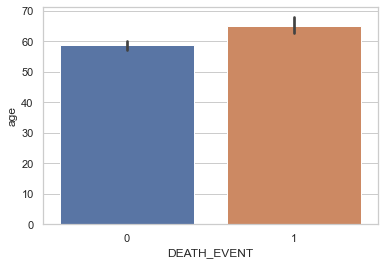

In [9]:
seaborn.set_theme(style="whitegrid")
seaborn.barplot('DEATH_EVENT','age',data=reduced_df)

No entanto, a coluna de idade utiliza intervalos de idades muito específicos.

Caso o modelo utilize esse recurso sem discretização, poderá concluir que pacientes com 60 anos tem mais chance de morrer em relação à aqueles com outras idades próximas.

Como observado nas verificações iniciais, temos a idade mínima de observação em 40 anos e o máximo em 95.

Iremos separar em grupos de 10 anos e avaliar se o agrupamento das idades está bem distribuído.

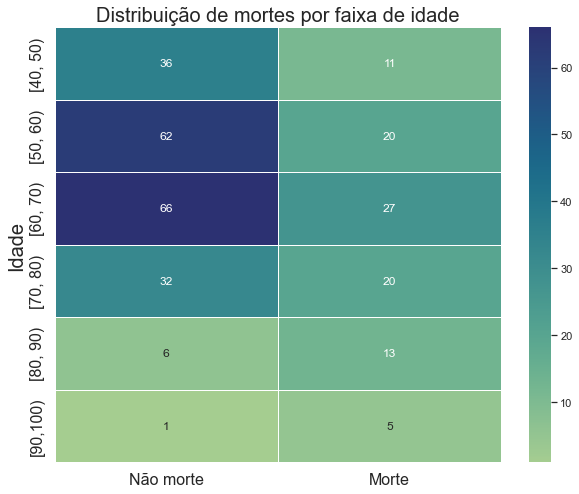

In [10]:
# Fazemos uma cópia dos dados para criar temporariamente um atributo de grupos de idade.
age_df = reduced_df.copy()
age_df["age_range"] = pandas.cut(age_df.age, bins=[40,50,60,70,80,90,100], right=False)

# Criamos uma lista com a quantidade de morte e não morte por faixa de idade.
# print(age_df.groupby(['age_range'])['DEATH_EVENT'].value_counts().sort_index())

# Transformamos a lista em uma matriz
age_correlation = [[36, 11], [62, 20], [66, 27], [32, 20], [6, 13], [1, 5]]
# print(age_correlation)

# label para faixa de idade
y_label = ["[40, 50)", "[50, 60)", "[60, 70)", "[70, 80)", "[80, 90)", "[90,100)"]

# Apresentação dos dados em forma de heatmap
fig, ax = plt.subplots(figsize=(10, 8))
ax = seaborn.heatmap(age_correlation, annot=True, fmt="d", cmap=seaborn.color_palette("crest", as_cmap=True), linewidths=.5, ax=ax)
ax.set_ylabel('Idade', fontsize=20)
ax.set_yticklabels(y_label, fontsize=16)
ax.set_xticklabels(["Não morte", "Morte"], fontsize=16)
ax.set_title('Distribuição de mortes por faixa de idade', fontsize=20)
fig.savefig('heatmap_idade.jpg')

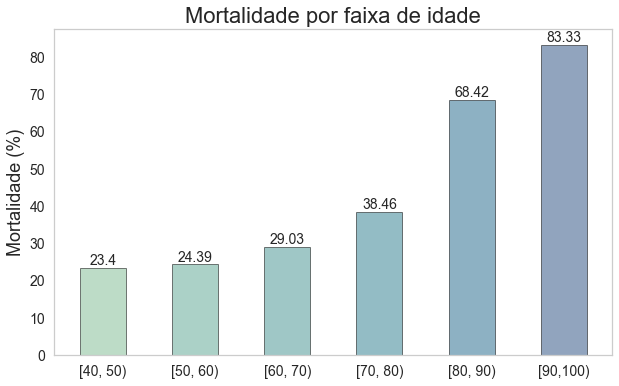

In [11]:
# Apenas informações de pessoas com mortes
death_data = age_df.loc[reduced_df['DEATH_EVENT'] == 1]

# Calculo da taxa de morte por faixa de idade
death_ratio_age_range = []
for age_range_info in age_correlation:
    qtd_death = age_range_info[1]
    total = age_range_info[0] + age_range_info[1]
    death_ratio_age_range.append(qtd_death / total)

# Atribuição de dados para o gráfico
x_data = ["[40, 50)", "[50, 60)", "[60, 70)", "[70, 80)", "[80, 90)", "[90,100)"]
y_data = [round(value * 100, 2) for value in death_ratio_age_range]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por faixa de idade', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
plt.grid(False)
fig.savefig('mortalidade_idade.png')
plt.show()

É notável que a distribuição está satisfatória, dessa forma, iremos aplicá-la.

In [12]:
conditions = [(reduced_df['age']<=40) & (reduced_df['age']<50),
            (reduced_df['age']>=50) & (reduced_df['age']<60),
            (reduced_df['age']>=60) & (reduced_df['age']<=70),
            (reduced_df['age']>=70) & (reduced_df['age']<80),
            (reduced_df['age']>=80) & (reduced_df['age']<90),
            reduced_df['age']>=90]
choices = [0,1,2,3,4,5]

reduced_df['simplified_age'] = numpy.select(conditions, choices)
reduced_df = reduced_df.drop(columns='age')
reduced_df.head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,simplified_age
0,0,582,0,20,1,265000.00,1.9,130,1,0,1,3
1,0,7861,0,38,0,263358.03,1.1,136,1,0,1,1
2,0,146,0,20,0,162000.00,1.3,129,1,1,1,2
3,1,111,0,20,0,210000.00,1.9,137,1,0,1,1
4,1,160,1,20,0,327000.00,2.7,116,0,0,1,2


<AxesSubplot:title={'center':'simplified_age'}>

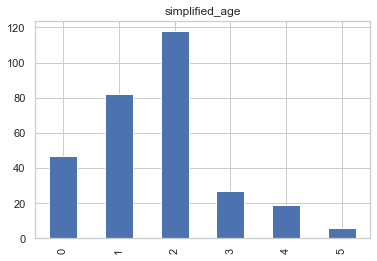

In [13]:
reduced_df['simplified_age'].value_counts().sort_index().plot(kind='bar', title='simplified_age')

##### Coluna `creatinine_phosphokinase`

Esta coluna apresenta informações do nível da enzima CPK no sangue (mcg/L)

Como informado no portal do [Mount Sinai Health System](https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test), os valores normais para Creatinofosfoquinase (CPK) são de 10 a 120 mcg/L.

Em adição, o gráfico abaixo exibe que no conjunto de dados existem muitos valores classificados como acima do normal.

<AxesSubplot:title={'center':'Distribuição de valores para creatinine_phosphokinase'}>

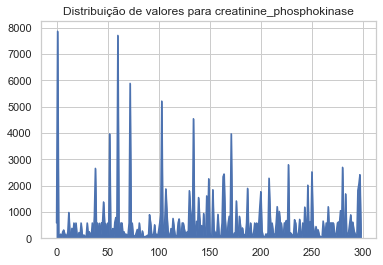

In [14]:
reduced_df['creatinine_phosphokinase'].plot(kind='area', title='Distribuição de valores para creatinine_phosphokinase')

reduced_df['creatinine_phosphokinase'].describe()

<AxesSubplot:title={'center':'Quartis de creatinine_phosphokinase'}>

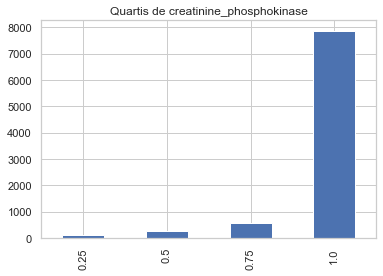

In [15]:
reduced_df['creatinine_phosphokinase'].quantile([0.25,0.5,0.75,1]).plot(kind='bar', title='Quartis de creatinine_phosphokinase')

Separaremos os quartis que apresentam valores acima do normal em mais 2 subgrupos (Muito alto e Extremamente alto).

Dessa forma, iremos discretizá-la utilizando esse parâmetro, agrupando-as nos níveis:
* Baixo: abaixo de 10 mcg/L;
* Normal: entre 10 mcg/L e 120 mcg/L;
* Alto: entre 121 mcg/L e 250 mcg/L;
* Muito alto: entre 251 mcg/L e 582 mcg/L;
* Extremamente alto: acima de 582 mcg/L;

In [16]:
conditions = [reduced_df['creatinine_phosphokinase']<10,
            (reduced_df['creatinine_phosphokinase']>=10) & (reduced_df['creatinine_phosphokinase']<=120),
            (reduced_df['creatinine_phosphokinase']>120) & (reduced_df['creatinine_phosphokinase']<=250),
            (reduced_df['creatinine_phosphokinase']>250) & (reduced_df['creatinine_phosphokinase']<=582),
            (reduced_df['creatinine_phosphokinase']>582)]
choices = [0,1,2,3,4]

reduced_df['simplified_cpk'] = numpy.select(conditions, choices)
reduced_df = reduced_df.drop(columns='creatinine_phosphokinase')
reduced_df.head()

,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,simplified_age,simplified_cpk
0,0,0,20,1,265000.00,1.9,130,1,0,1,3,3
1,0,0,38,0,263358.03,1.1,136,1,0,1,1,4
2,0,0,20,0,162000.00,1.3,129,1,1,1,2,2
3,1,0,20,0,210000.00,1.9,137,1,0,1,1,1
4,1,1,20,0,327000.00,2.7,116,0,0,1,2,2


<AxesSubplot:title={'center':'simplified_cpk'}>

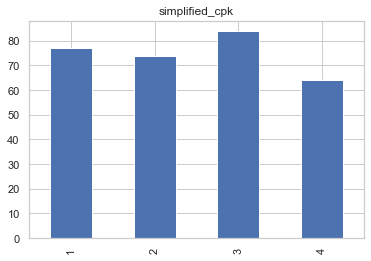

In [17]:
reduced_df['simplified_cpk'].value_counts().sort_index().plot(kind='bar', title='simplified_cpk')

##### Coluna `ejection_fraction`

Esta coluna apresenta dados sobre a fração de ejeção de sangue no coração do paciente.

Como informado no portal da [American Heart Association](https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement):

* Uma medição da fração de ejeção abaixo de 40% pode ser evidência de insuficiência cardíaca ou cardiomiopatia;

* Entre 41% a 49% pode ser considerado “limítrofe”. Nem sempre indica que uma pessoa está desenvolvendo insuficiência cardíaca. Em vez disso, pode indicar danos, talvez de um ataque cardíaco anterior;

* A fração de ejeção de um coração normal pode estar entre 50% e 70%;

* Uma medição da fração de ejeção superior a 75% pode indicar uma condição cardíaca, como cardiomiopatia hipertrófica.

Realizaremos a discretização dos dados desta coluna agrupando com base nestes parâmetros.


Como demonstra o gráfico abaixo, é possível verificar que grande parte dos pacientes da base de dados possui este parâmetro abaixo de 30.

<AxesSubplot:title={'center':'Quartis de ejection_fraction'}>

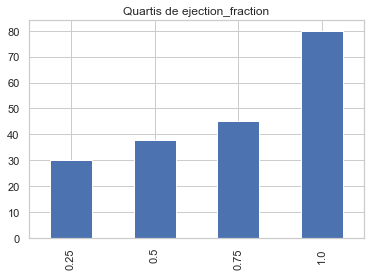

In [18]:
reduced_df['ejection_fraction'].quantile([0.25,0.5,0.75,1]).plot(kind='bar', title='Quartis de ejection_fraction')

In [19]:
reduced_df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Dessa forma, também definiremos um subgrupo para estes que possuem valores igual ou abaixo de 30.

In [20]:
conditions = [reduced_df['ejection_fraction']<=30,
            (reduced_df['ejection_fraction']>30) & (reduced_df['ejection_fraction']<=40),
            (reduced_df['ejection_fraction']>40) & (reduced_df['ejection_fraction']<50),
            (reduced_df['ejection_fraction']>=50) & (reduced_df['ejection_fraction']<=70),
            (reduced_df['ejection_fraction']>70) & (reduced_df['ejection_fraction']<=75),
            reduced_df['ejection_fraction']>75]
choices = [0,1,2,3,4,5]

reduced_df['simplified_ef'] = numpy.select(conditions, choices)
reduced_df = reduced_df.drop(columns='ejection_fraction')
reduced_df.head()

,anaemia,diabetes,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,simplified_age,simplified_cpk,simplified_ef
0,0,0,1,265000.00,1.9,130,1,0,1,3,3,0
1,0,0,0,263358.03,1.1,136,1,0,1,1,4,1
2,0,0,0,162000.00,1.3,129,1,1,1,2,2,0
3,1,0,0,210000.00,1.9,137,1,0,1,1,1,0
4,1,1,0,327000.00,2.7,116,0,0,1,2,2,0


<AxesSubplot:title={'center':'simplified_ef'}>

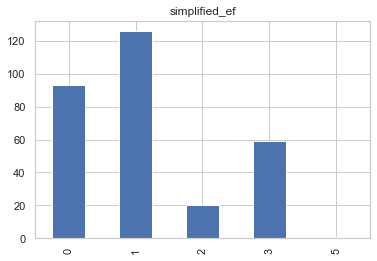

In [21]:
reduced_df['simplified_ef'].value_counts().sort_index().plot(kind='bar', title='simplified_ef')

##### Coluna `platelets`

Esta coluna apresenta dados sobre o nível de plaquetas no sangue (quiloplaquetas/mL).

Como informado no portal do [Johns Hopkins Medicine International](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important):

* Uma contagem normal de plaquetas varia de 150.000 a 450.000 plaquetas por microlitro de sangue.

* Ter mais de 450.000 plaquetas é uma condição chamada trombocitose;

* Ter menos de 150.000 é conhecido como trombocitopenia.

Realizaremos a discretização dos dados desta coluna agrupando com base nestes parâmetros, repatindo o grupo de classificação normal em mais 3 subgrupos de intervalos de extensão equivalentes.

In [22]:
conditions = [reduced_df['platelets']<150000,
            (reduced_df['platelets']>=150000) & (reduced_df['platelets']<=250000),
            (reduced_df['platelets']>250000) & (reduced_df['platelets']<=350000),
            (reduced_df['platelets']>350000) & (reduced_df['platelets']<=450000),
            reduced_df['platelets']>450000]
choices = [0,1,2,3,4]

reduced_df['simplified_platelets'] = numpy.select(conditions, choices)
reduced_df = reduced_df.drop(columns='platelets')
reduced_df.head()

,anaemia,diabetes,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,simplified_age,simplified_cpk,simplified_ef,simplified_platelets
0,0,0,1,1.9,130,1,0,1,3,3,0,2
1,0,0,0,1.1,136,1,0,1,1,4,1,2
2,0,0,0,1.3,129,1,1,1,2,2,0,1
3,1,0,0,1.9,137,1,0,1,1,1,0,1
4,1,1,0,2.7,116,0,0,1,2,2,0,2


<AxesSubplot:title={'center':'simplified_platelets'}>

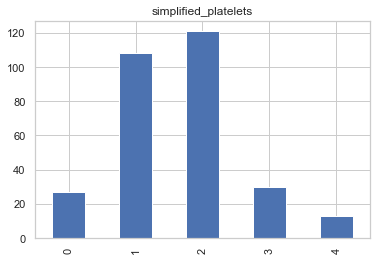

In [23]:
reduced_df['simplified_platelets'].value_counts().sort_index().plot(kind='bar', title='simplified_platelets')

##### Coluna `serum_creatinine`

Esta coluna apresenta dados sobre o nível de creatinina sérica no sangue (mg/dL).

Como informado no portal [emedicinehealth](https://www.emedicinehealth.com/creatinine_blood_tests/article_em.htm), os intervalos normais de creatinina sérica são:

* 0,6–1,1 mg/dL em mulheres e adolescentes com 16 anos ou mais;
* 0,8–1,3 mg/dL em homens e adolescentes com 16 anos ou mais.

Em uma discussão no [site da base de dados](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/discussion/181241) foi informado que homens são atribuidos com valor 1 e mulheres com valor 0.

Realizaremos a discretização dos dados desta coluna agrupando com base nestes parâmetros.

Além disto, no gráfico abaixo é possível verificar que existem muitos pacientes com valores identificados como acima do normal.

<AxesSubplot:title={'center':'Distribuição de valores para serum_cratinine'}>

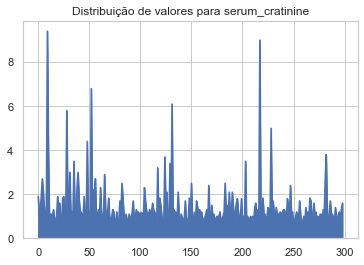

In [24]:
reduced_df['serum_creatinine'].plot(kind='area', title='Distribuição de valores para serum_cratinine')

<AxesSubplot:title={'center':'Quartis de serum_creatinine'}>

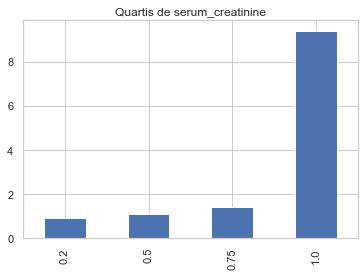

In [25]:
reduced_df['serum_creatinine'].quantile([0.2,0.5,0.75,1]).plot(kind='bar', title='Quartis de serum_creatinine')

Dessa forma, separaremos em mais um subgrupo acima do valor normal para ambos os sexos utilizando intervalo de 0.5, assim como ocorre no intervalo do parâmetro normal:
* Alto: +0.5 nas médias normais de homens e mulheres;
* Muito alto: acima das médias altas de homens e mulheres;

In [26]:
conditions = [((reduced_df['sex']==0) & (reduced_df['serum_creatinine']<0.6)) | ((reduced_df['sex']==1) & (reduced_df['serum_creatinine']<0.8)),
            ((reduced_df['sex']==0) & ((reduced_df['serum_creatinine']>=0.6) & (reduced_df['serum_creatinine']<=1.1))) | ((reduced_df['sex']==1) & ((reduced_df['serum_creatinine']>=0.8) & (reduced_df['serum_creatinine']<=1.3))),
            ((reduced_df['sex']==0) & ((reduced_df['serum_creatinine']>1.1) & (reduced_df['serum_creatinine']<=1.6))) | ((reduced_df['sex']==1) & ((reduced_df['serum_creatinine']>1.3) & (reduced_df['serum_creatinine']<=1.8))),
            ((reduced_df['sex']==0) & (reduced_df['serum_creatinine']>1.6)) | ((reduced_df['sex']==1) & (reduced_df['serum_creatinine']>1.8))]
choices = [0,1,2,3]

reduced_df['simplified_creatinine'] = numpy.select(conditions, choices)
reduced_df = reduced_df.drop(columns='serum_creatinine')
reduced_df.head()

,anaemia,diabetes,high_blood_pressure,serum_sodium,sex,smoking,DEATH_EVENT,simplified_age,simplified_cpk,simplified_ef,simplified_platelets,simplified_creatinine
0,0,0,1,130,1,0,1,3,3,0,2,3
1,0,0,0,136,1,0,1,1,4,1,2,1
2,0,0,0,129,1,1,1,2,2,0,1,1
3,1,0,0,137,1,0,1,1,1,0,1,3
4,1,1,0,116,0,0,1,2,2,0,2,3


<AxesSubplot:title={'center':'simplified_creatinine'}>

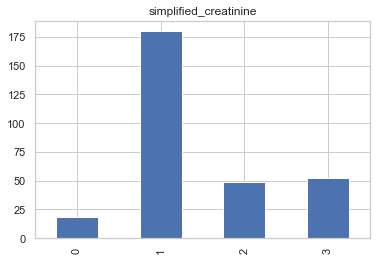

In [27]:
reduced_df['simplified_creatinine'].value_counts().sort_index().plot(kind='bar', title='simplified_creatinine')

Podemos verificar que a distribuição para valores acima da média está bem distribuída.

##### Coluna `serum_sodium`

Como informado no portal da [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711#:~:text=A%20normal%20blood%20sodium%20level,Certain%20medications.), um nível normal de sódio no sangue está entre 135 e 145 miliequivalentes por litro (mEq/L).

Realizaremos a discretização dos dados desta coluna agrupando com base nestes parâmetros.

In [28]:
conditions = [reduced_df['serum_sodium']<135,
            (reduced_df['serum_sodium']>=135) & (reduced_df['serum_sodium']<=145),
            reduced_df['serum_sodium']>145]
choices = [0,1,2]

reduced_df['simplified_sodium'] = numpy.select(conditions, choices)
reduced_df = reduced_df.drop(columns='serum_sodium')
reduced_df.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,simplified_age,simplified_cpk,simplified_ef,simplified_platelets,simplified_creatinine,simplified_sodium
0,0,0,1,1,0,1,3,3,0,2,3,0
1,0,0,0,1,0,1,1,4,1,2,1,1
2,0,0,0,1,1,1,2,2,0,1,1,0
3,1,0,0,1,0,1,1,1,0,1,3,1
4,1,1,0,0,0,1,2,2,0,2,3,0


<AxesSubplot:title={'center':'simplified_sodium'}>

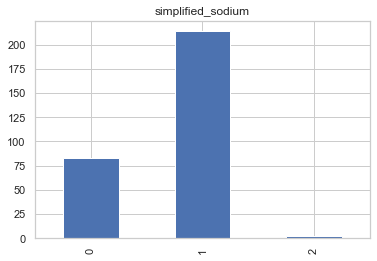

In [29]:
reduced_df['simplified_sodium'].value_counts().sort_index().plot(kind='bar', title='simplified_sodium')

### Visualização Final dos Dados

<AxesSubplot:>

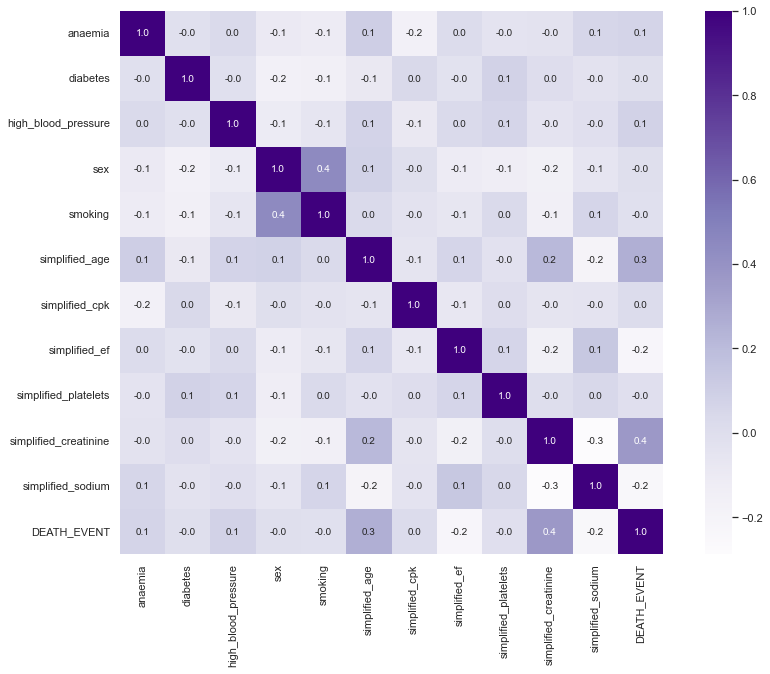

In [30]:
move = reduced_df.pop('DEATH_EVENT')
reduced_df['DEATH_EVENT'] = move

plt.figure(figsize=(15,10))
correlated=reduced_df.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Purples',annot_kws={'size':10},fmt='.1f')

Após o tratamento dos dados verificamos as seguintes mudanças nas correlações de `DEATH_EVENT` com as demais colunas:

* Houveram diminuições na correlação de `creatinine_phosphokinase` (0.1 para 0.0) e `ejection_fraction` (0.3 para 0.2) devido aos agrupamentos feitos.

* Houve aumento na correlação de `serum_creatinine` (0.3 para 0.4), devido à classificação de agrupamento feita, utilizando como parâmetro os sexos dos pacientes.

Por fim, exportamos os bancos gerados em formato .csv, para serem aplicados na solução.

In [31]:
reduced_continuous_df.to_csv('reduced_continuos_df.csv', index=False)
reduced_df.to_csv('reduced_df.csv', index=False)